In [1]:
!pip install scanpy anndata palantir
#https://github.com/dpeerlab/Palantir/blob/master/notebooks/Palantir_sample_notebook.ipynb

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [7]:
import scanpy.external as sc
import scanpy as sc

In [8]:
# Descargar y descomprimir solo la carpeta `data`
!wget https://github.com/dpeerlab/Palantir/archive/refs/heads/master.zip
!unzip master.zip "Palantir-master/data/*"
!rm master.zip


--2024-09-03 03:32:22--  https://github.com/dpeerlab/Palantir/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/dpeerlab/Palantir/zip/refs/heads/master [following]
--2024-09-03 03:32:23--  https://codeload.github.com/dpeerlab/Palantir/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [             <=>    ]  36.88M  6.00MB/s    in 6.2s    

2024-09-03 03:32:29 (6.00 MB/s) - ‘master.zip’ saved [38673834]

Archive:  master.zip
5fe3b46043dd32c30942ae297071bd9c71794ac1
   creating: Palantir-master/data/
 extracting: Palantir-master/data/marrow_s

In [25]:
import palantir
import scanpy as sc
import pandas as pd
import os

# Plotting
import matplotlib
import matplotlib.pyplot as plt

# warnings
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)

# Inline plotting
%matplotlib inline

In [26]:
# Load sample data
data_dir = os.path.expanduser("./")
download_url = "https://dp-lab-data-public.s3.amazonaws.com/palantir/marrow_sample_scseq_counts.h5ad"
file_path = os.path.join(data_dir, "marrow_sample_scseq_counts.h5ad")
ad = sc.read(file_path, backup_url=download_url)
ad

  0%|          | 0.00/69.9M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 4142 × 16106

In [27]:
sc.pp.normalize_per_cell(ad)


In [28]:
palantir.preprocess.log_transform(ad)


In [29]:
sc.pp.highly_variable_genes(ad, n_top_genes=1500, flavor="cell_ranger")


In [30]:
# Note in the manuscript, we did not use highly variable genes but scanpy by default uses only highly variable genes
sc.pp.pca(ad)

In [31]:
ad

AnnData object with n_obs × n_vars = 4142 × 16106
    obs: 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [32]:
dm_res = palantir.utils.run_diffusion_maps(ad, n_components=5)


In [33]:
ms_data = palantir.utils.determine_multiscale_space(ad)


In [34]:
sc.pp.neighbors(ad)
sc.tl.umap(ad)

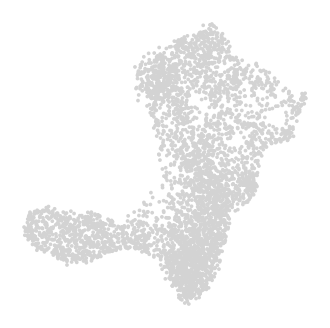

In [35]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    ad,
    basis="umap",
    frameon=False,
)

In [36]:
imputed_X = palantir.utils.run_magic_imputation(ad)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


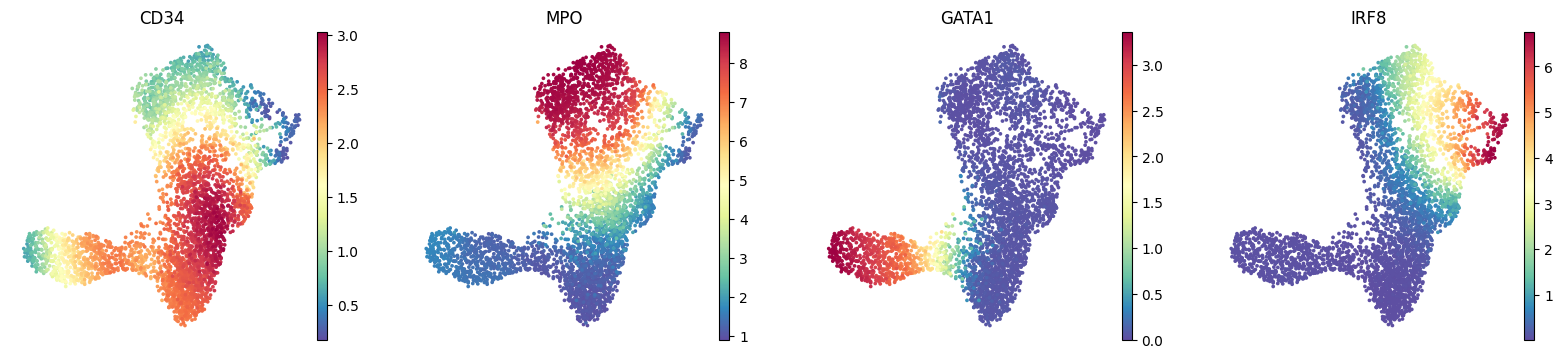

In [37]:
sc.pl.embedding(
    ad,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["CD34", "MPO", "GATA1", "IRF8"],
    frameon=False,
)
plt.show()

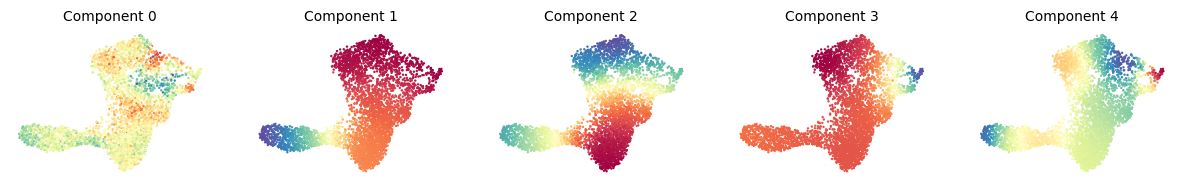

In [38]:
palantir.plot.plot_diffusion_components(ad)
plt.show()

In [39]:
terminal_states = pd.Series(
    ["DC", "Mono", "Ery"],
    index=["Run5_131097901611291", "Run5_134936662236454", "Run4_200562869397916"],
)

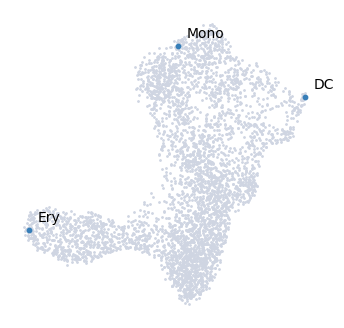

In [40]:
palantir.plot.highlight_cells_on_umap(ad, terminal_states)
plt.show()

In [41]:
start_cell = "Run5_164698952452459"
pr_res = palantir.core.run_palantir(
    ad, start_cell, num_waypoints=500, terminal_states=terminal_states
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.004956793785095215 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Time for shortest paths: 0.4313644528388977 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


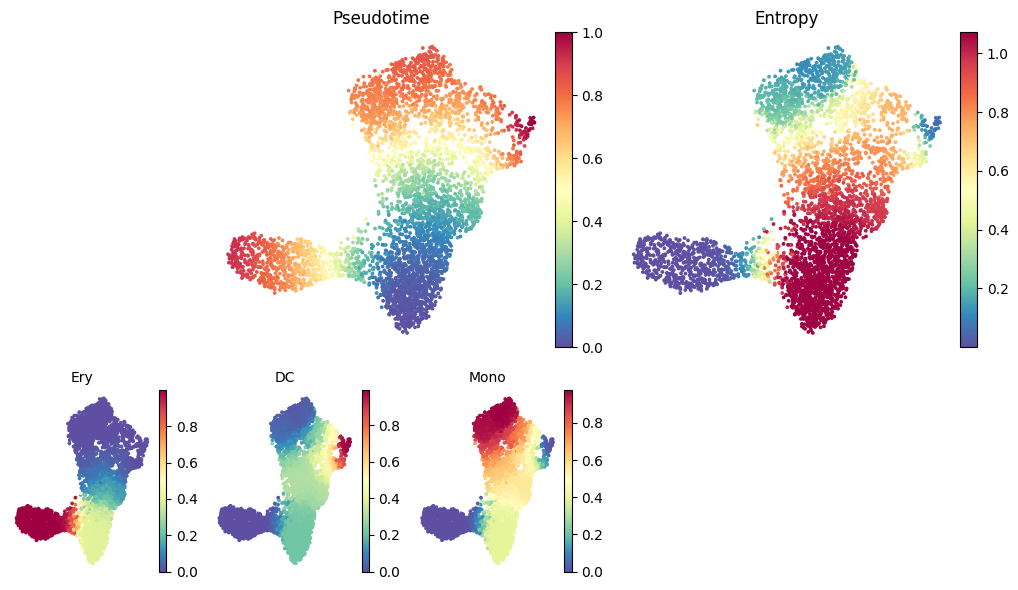

In [42]:
palantir.plot.plot_palantir_results(ad, s=3)
plt.show()

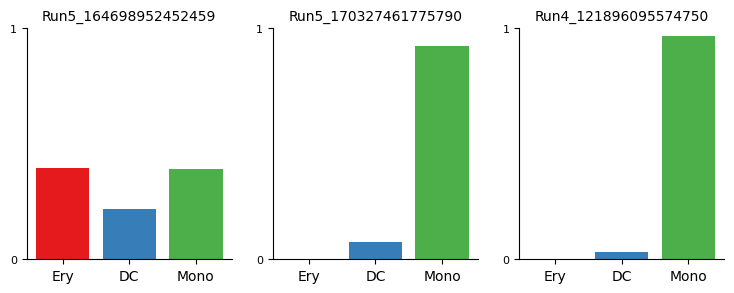

In [43]:
cells = [
    "Run5_164698952452459",
    "Run5_170327461775790",
    "Run4_121896095574750",
]
palantir.plot.plot_terminal_state_probs(ad, cells)
plt.show()

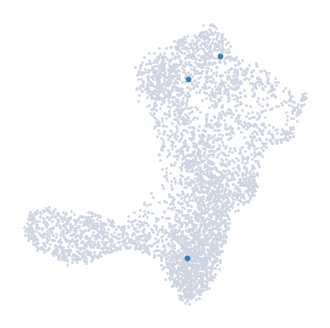

In [44]:
palantir.plot.highlight_cells_on_umap(ad, cells)
plt.show()

In [45]:
masks = palantir.presults.select_branch_cells(ad, q=.01, eps=.01)


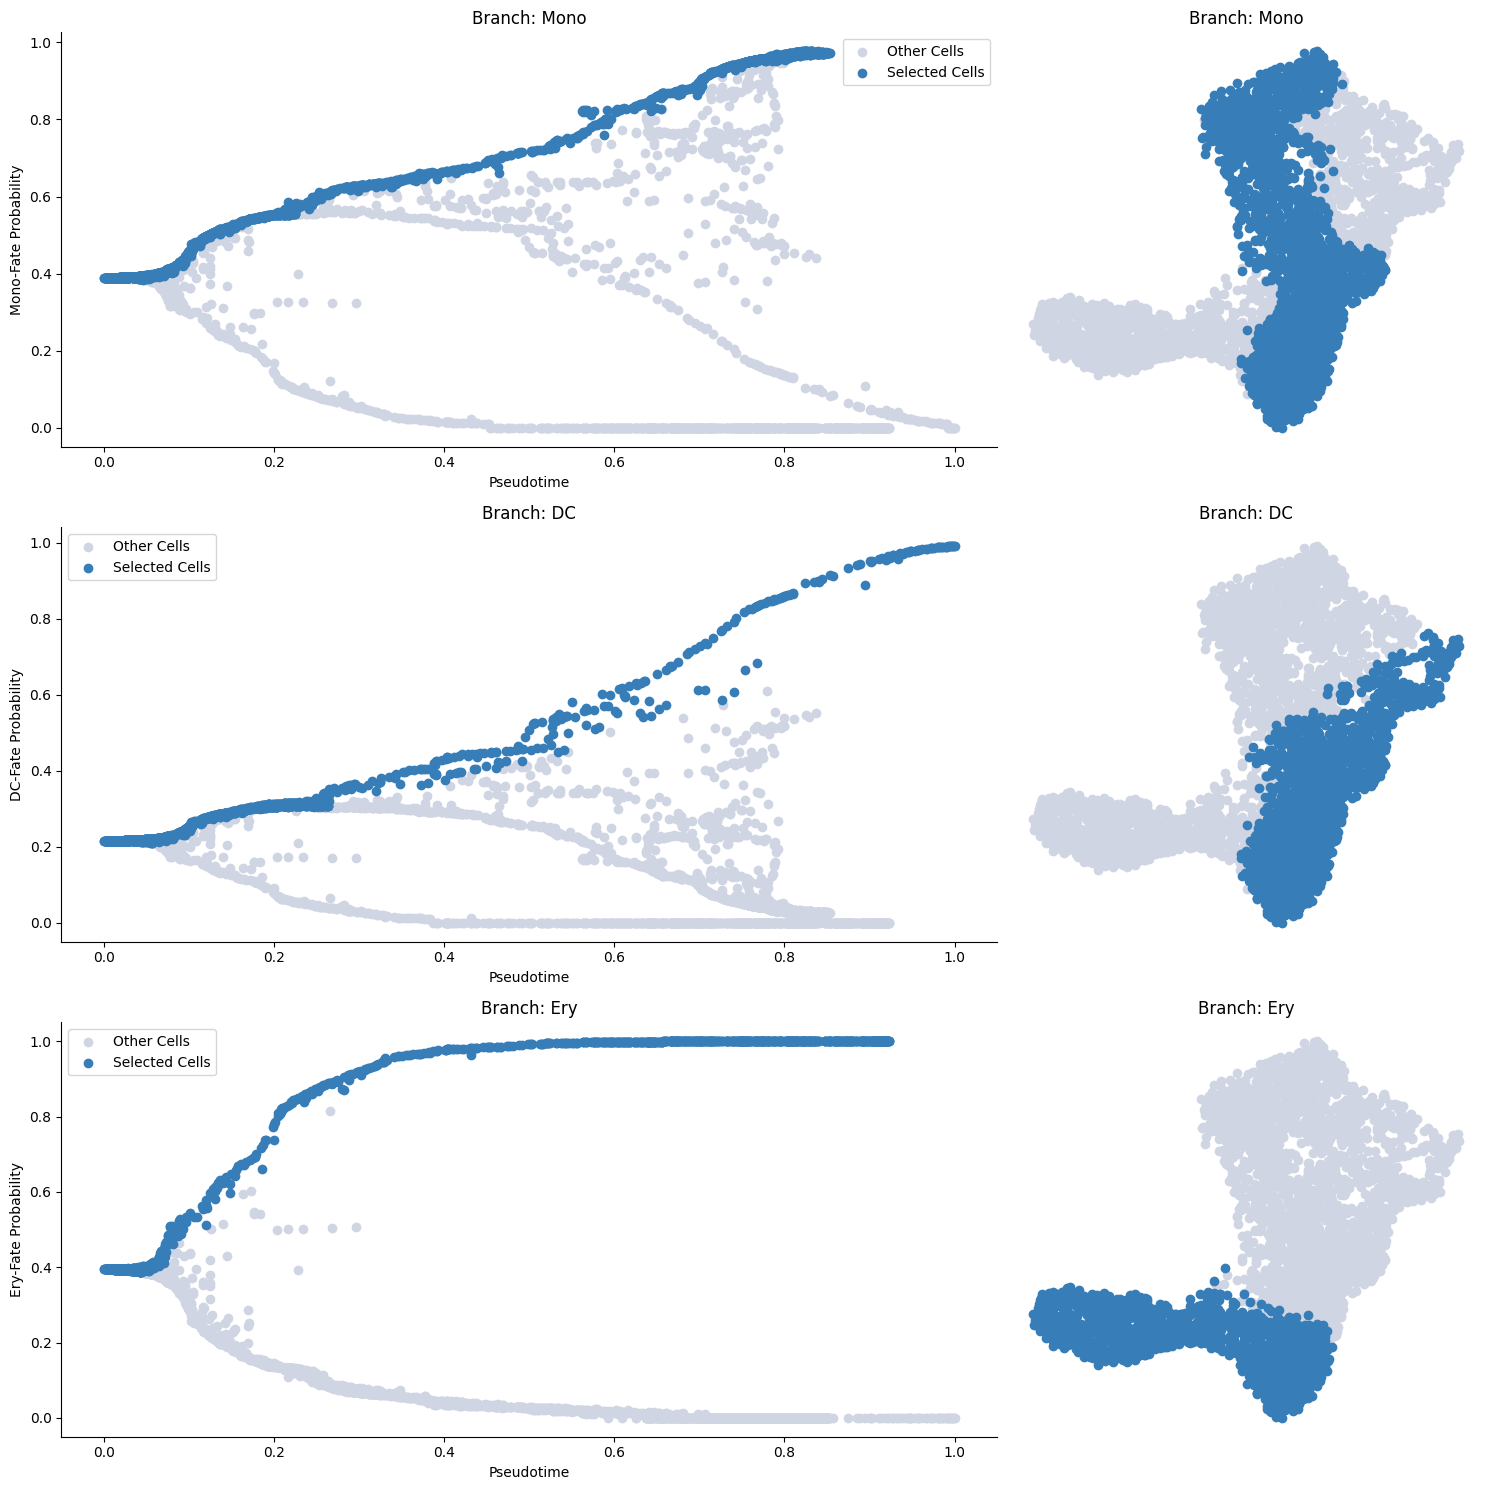

In [46]:
palantir.plot.plot_branch_selection(ad)
plt.show()

[2024-09-03 03:49:25,436] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (1,566) and rank = 1.0.
[2024-09-03 03:49:25,439] [INFO    ] Using covariance function Matern52(ls=1.0799293518066406).
[2024-09-03 03:49:25,509] [INFO    ] Computing 50 landmarks with k-means clustering.


<Axes: title={'center': 'Branch: Ery'}>

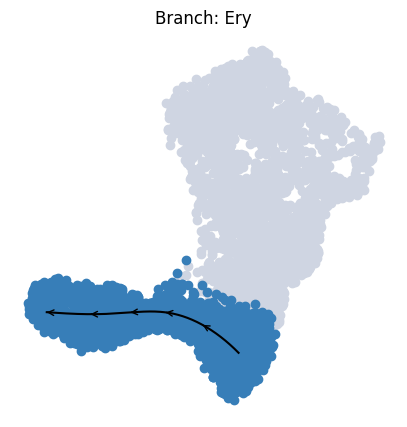

In [47]:
palantir.plot.plot_trajectory(ad, "Ery")


[2024-09-03 03:49:29,016] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (1,912) and rank = 1.0.
[2024-09-03 03:49:29,018] [INFO    ] Using covariance function Matern52(ls=1.0799293518066406).
[2024-09-03 03:49:29,060] [INFO    ] Computing 50 landmarks with k-means clustering.


<Axes: title={'center': 'Branch: DC'}, xlabel='UMAP1', ylabel='UMAP2'>

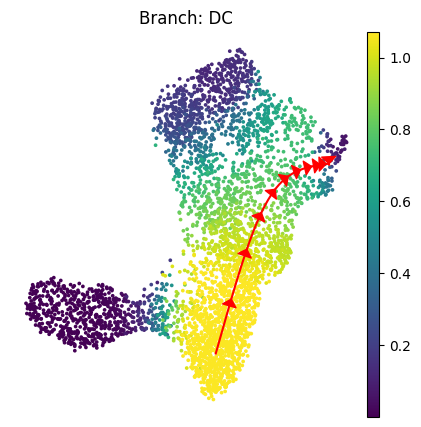

In [48]:
palantir.plot.plot_trajectory(
    ad,
    "DC",
    cell_color="palantir_entropy",
    n_arrows=10,
    color="red",
    scanpy_kwargs=dict(cmap="viridis"),
    arrowprops=dict(arrowstyle="-|>,head_length=.5,head_width=.5"),
)

In [49]:
gene_trends = palantir.presults.compute_gene_trends(
    ad,
    expression_key="MAGIC_imputed_data",
)

Ery
[2024-09-03 03:49:30,604] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (1,566) and rank = 1.0.
[2024-09-03 03:49:30,607] [INFO    ] Using covariance function Matern52(ls=1.0).
DC
[2024-09-03 03:49:36,945] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (1,912) and rank = 1.0.
[2024-09-03 03:49:36,946] [INFO    ] Using covariance function Matern52(ls=1.0).
Mono
[2024-09-03 03:49:45,096] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (2,592) and rank = 1.0.
[2024-09-03 03:49:45,098] [INFO    ] Using covariance function Matern52(ls=1.0).


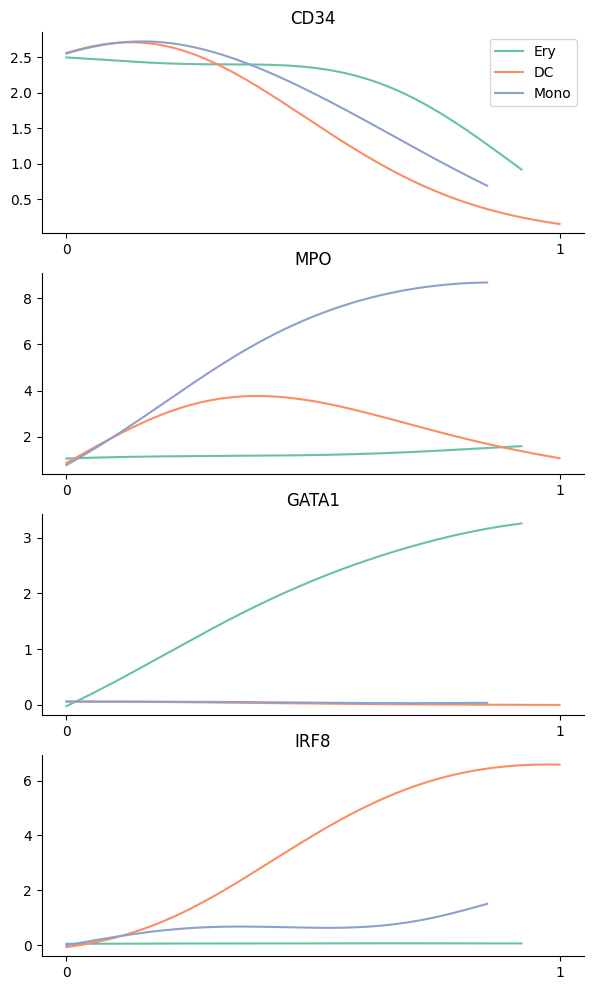

In [50]:
genes = ["CD34", "MPO", "GATA1", "IRF8"]
palantir.plot.plot_gene_trends(ad, genes)
plt.show()

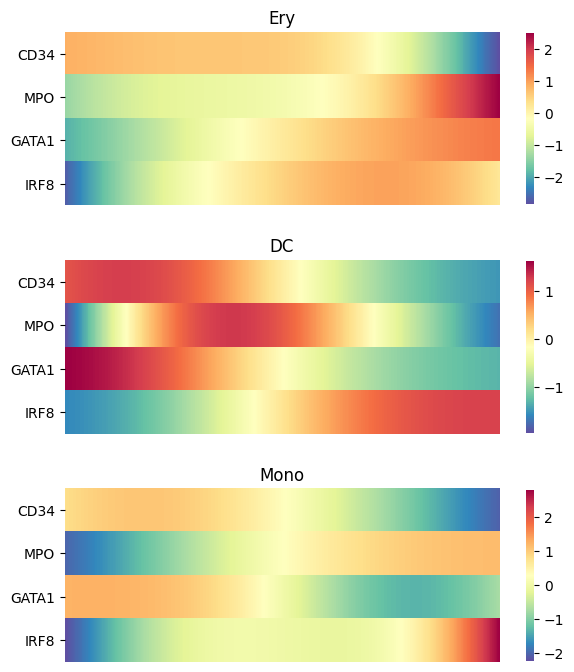

In [51]:
palantir.plot.plot_gene_trend_heatmaps(ad, genes)
plt.show()

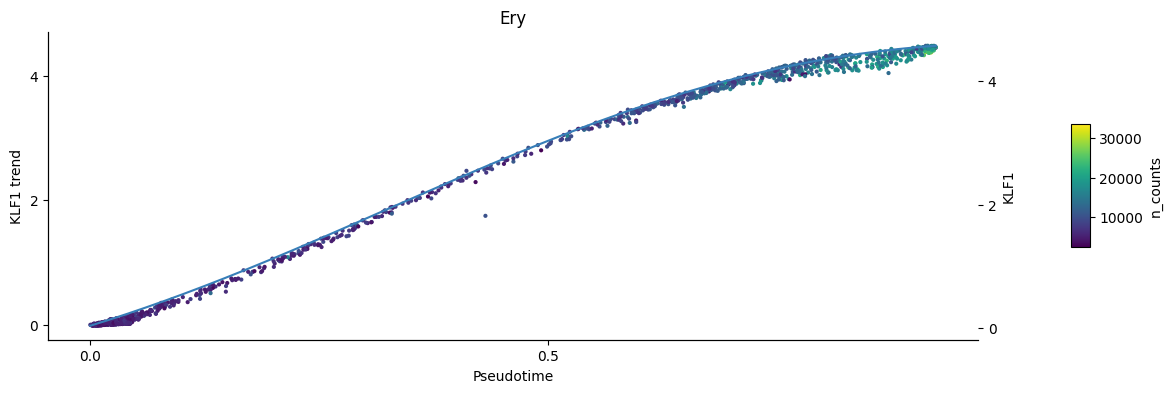

In [52]:
palantir.plot.plot_trend(ad, "Ery", "KLF1", color="n_counts", position_layer="MAGIC_imputed_data")
plt.show()

In [10]:
sc.pp.filter_cells(adata, min_counts=1000)
sc.pp.filter_genes(adata, min_counts=10)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)


In [11]:
sc.pp.neighbors(adata, knn=30)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 14546 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [12]:
sce.tl.palantir(adata, n_components=5, knn=30)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [13]:
sc.tl.tsne(adata, n_pcs=2, use_rep='X_palantir_multiscale', perplexity=150)

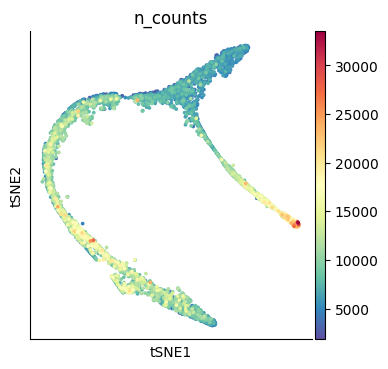

In [14]:
sc.pl.tsne(adata, color="n_counts")

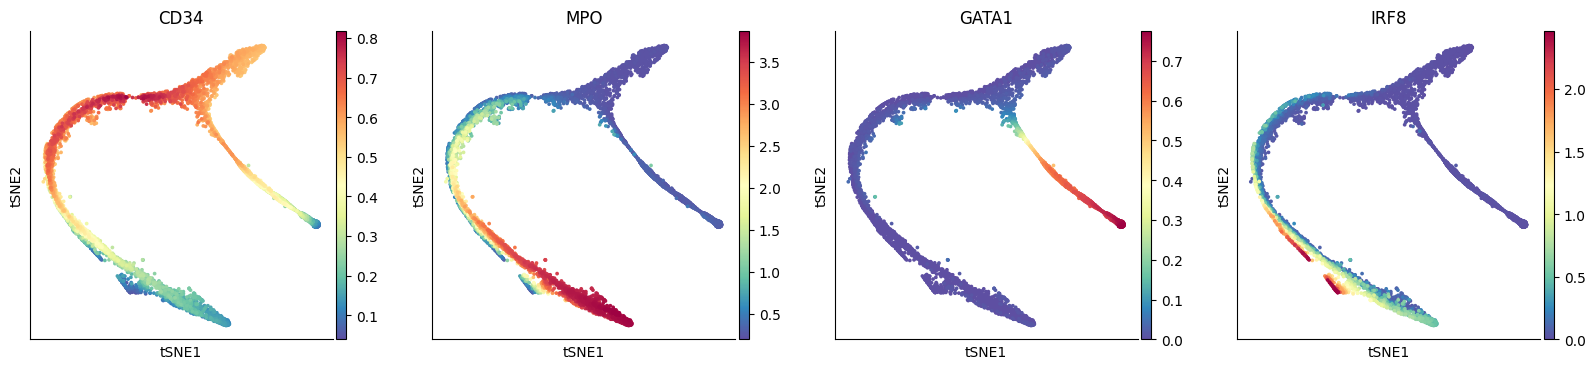

In [15]:
sc.pl.tsne(adata, gene_symbols=['CD34', 'MPO', 'GATA1', 'IRF8'],layer='palantir_imp',color=['CD34', 'MPO', 'GATA1', 'IRF8'])

In [16]:
start_cell = 'Run5_164698952452459'
pr_res = sce.tl.palantir_results(adata, early_cell=start_cell, ms_data='X_palantir_multiscale', num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.007908236980438233 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Time for shortest paths: 0.2948971470197042 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [22]:
sce.tl.palantir_results(adata,early_cell = 'Run5_164698952452459')


Sampling and flocking waypoints...
Time for determining waypoints: 0.034559233983357744 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.18633358478546141 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [24]:
sce.plot_palantir_results(ad, s=3)
plt.show()

AttributeError: module 'scanpy.external' has no attribute 'plot_palantir_results'